<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [5]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-07 02:19:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.5MB/s    in 2.4s    

2025-12-07 02:19:31 (64.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [7]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



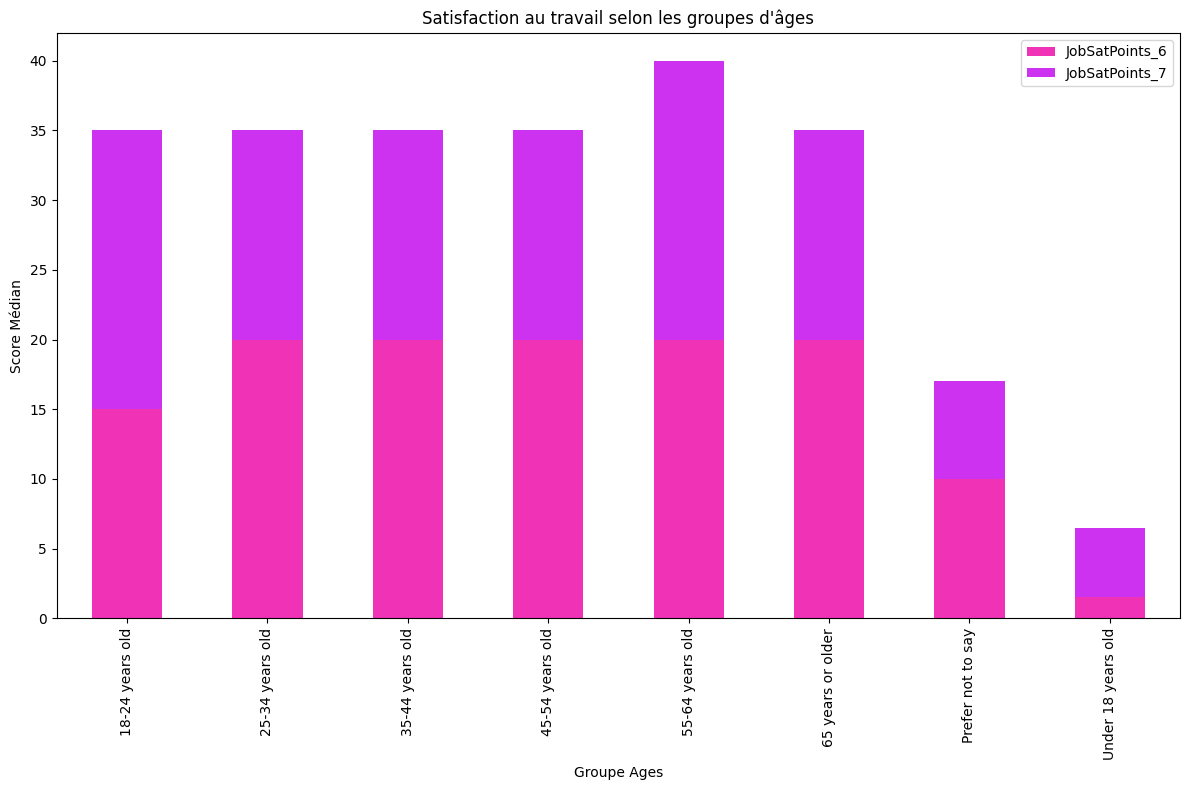

In [16]:
##Write your code here
df_new = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

my_colors = ['#F032B6', '#CD32F0']
df_new.plot(kind='bar', stacked=True, figsize=(12, 8), color=my_colors)
plt.title('Satisfaction au travail selon les groupes d\'âges')
plt.xlabel('Groupe Ages')
plt.ylabel('Score Médian')

plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_4497/1067046773.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


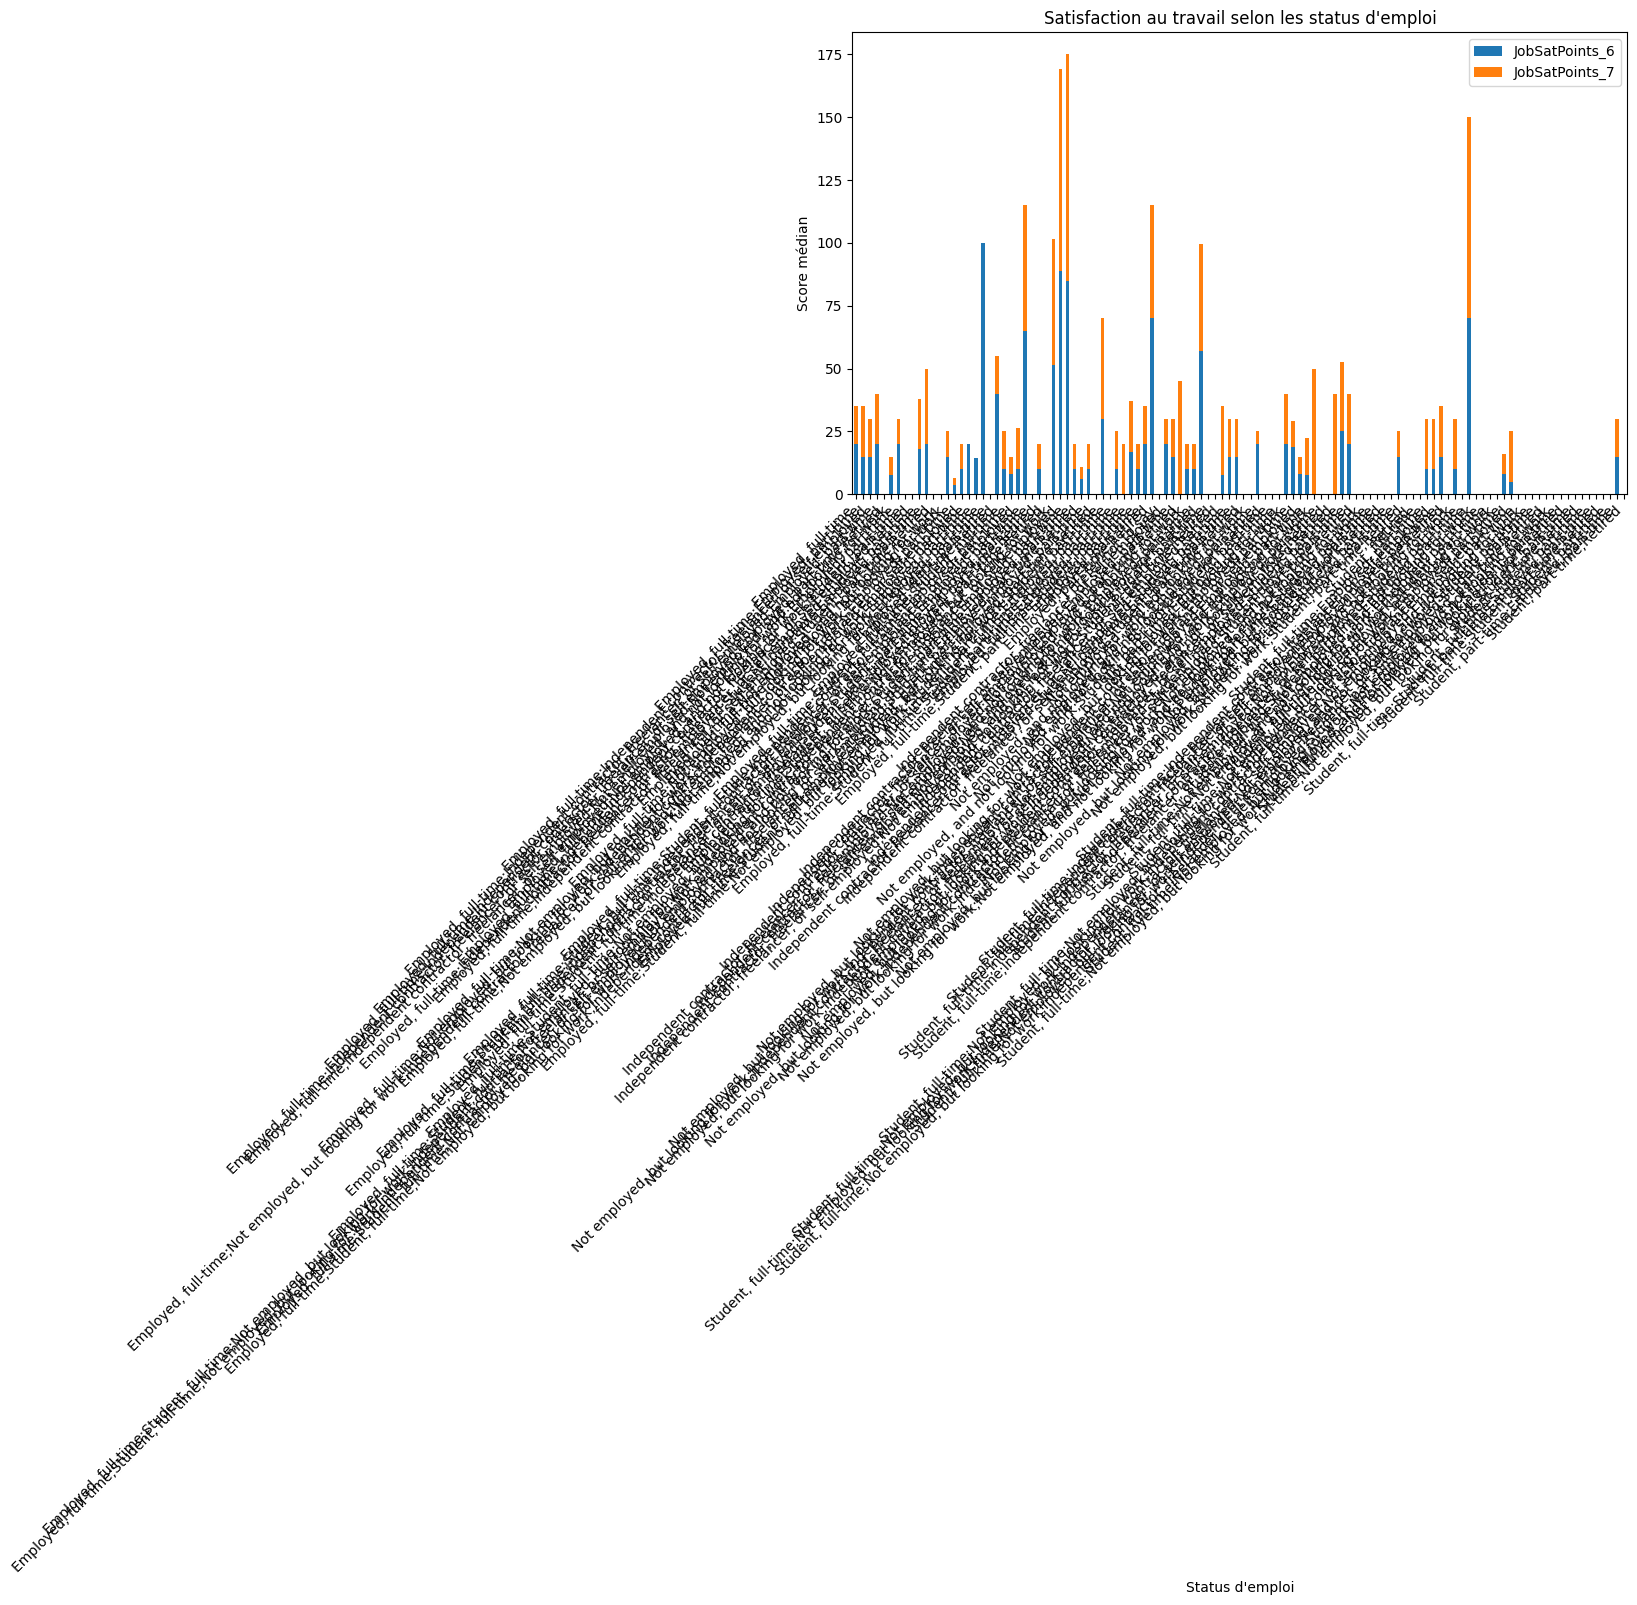

In [17]:
##Write your code here
df_grouped = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Satisfaction au travail selon les status d\'emploi')
plt.xlabel('Status d\'emploi')
plt.ylabel('Score médian')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


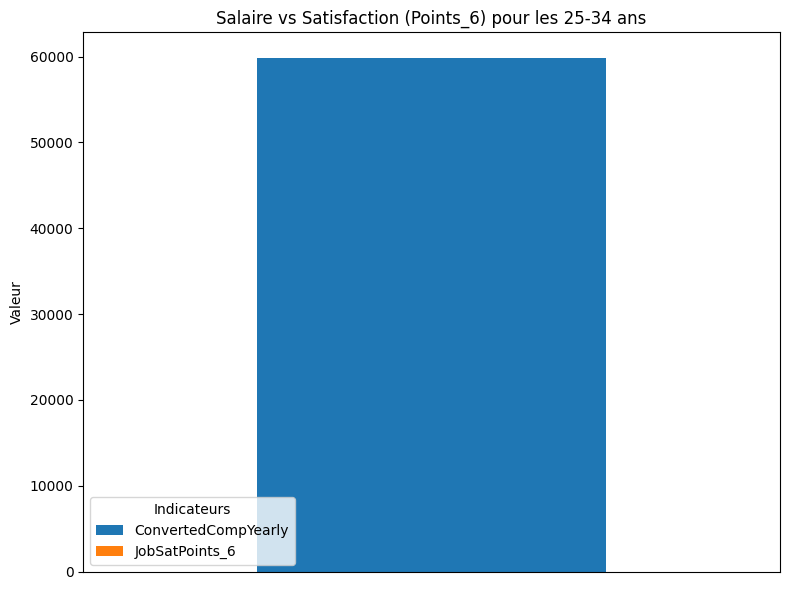

Valeurs calculées :
ConvertedCompYearly    59825.0
JobSatPoints_6            20.0
dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. On filtre pour ne garder que la tranche '25-34 years old'
# (C'est celle qui couvre le mieux la demande 30-35 ans)
df_filtered = df[df['Age'] == '25-34 years old']

# 2. On calcule la médiane des deux indicateurs pour ce groupe
data_median = df_filtered[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# 3. Préparation pour le graphique
# On transforme la série en DataFrame et on transpose (.T) pour avoir une ligne à dessiner
df_to_plot = pd.DataFrame(data_median).T

# 4. Création du Graphique Empilé
df_to_plot.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Salaire vs Satisfaction (Points_6) pour les 25-34 ans')
plt.ylabel('Valeur')
plt.xticks([]) # On enlève les étiquettes X inutiles car il n'y a qu'une barre
plt.legend(title='Indicateurs')

plt.tight_layout()
plt.show()

# Petit print pour voir les valeurs car le salaire écrase visuellement la satisfaction
print("Valeurs calculées :")
print(data_median)

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


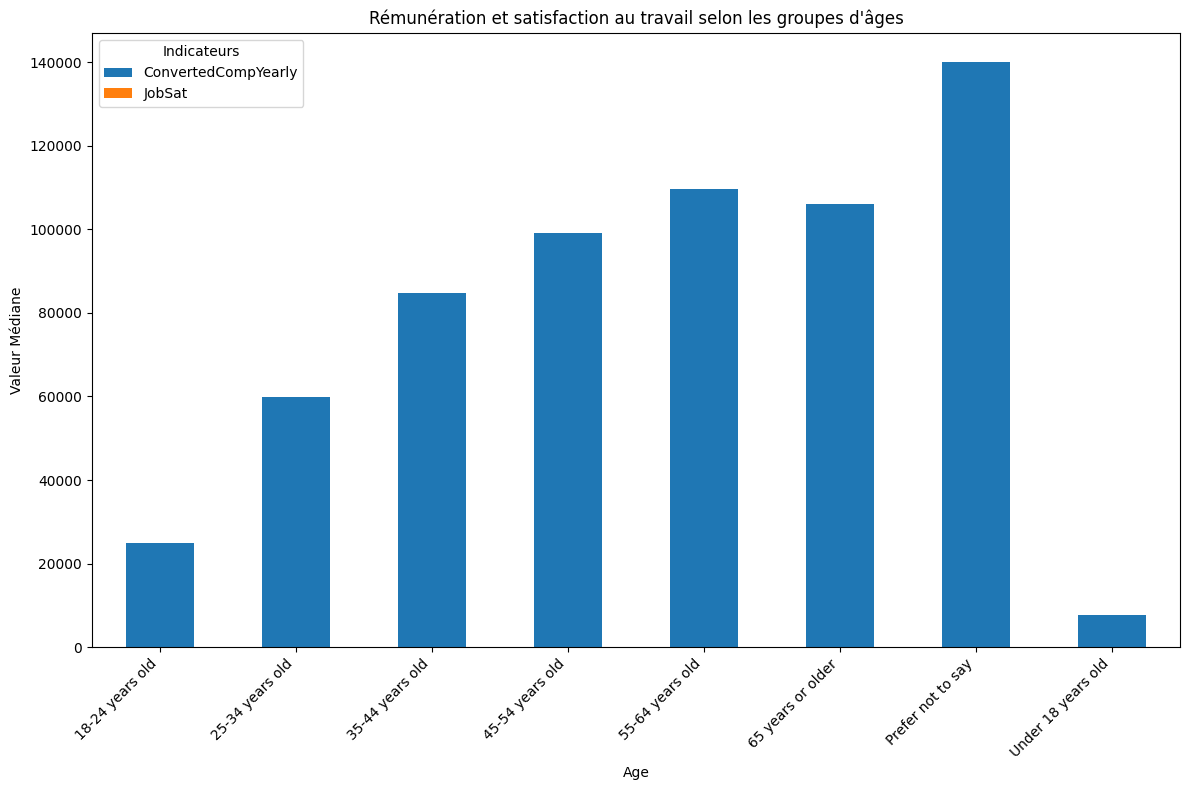

In [15]:
##Write your code here
df_grouped = df.groupby('Age')[['ConvertedCompYearly', 'JobSat']].median()

df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Rémunération et satisfaction au travail selon les groupes d\'âges')
plt.xlabel('Age')
plt.ylabel('Valeur Médiane')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Indicateurs')

plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


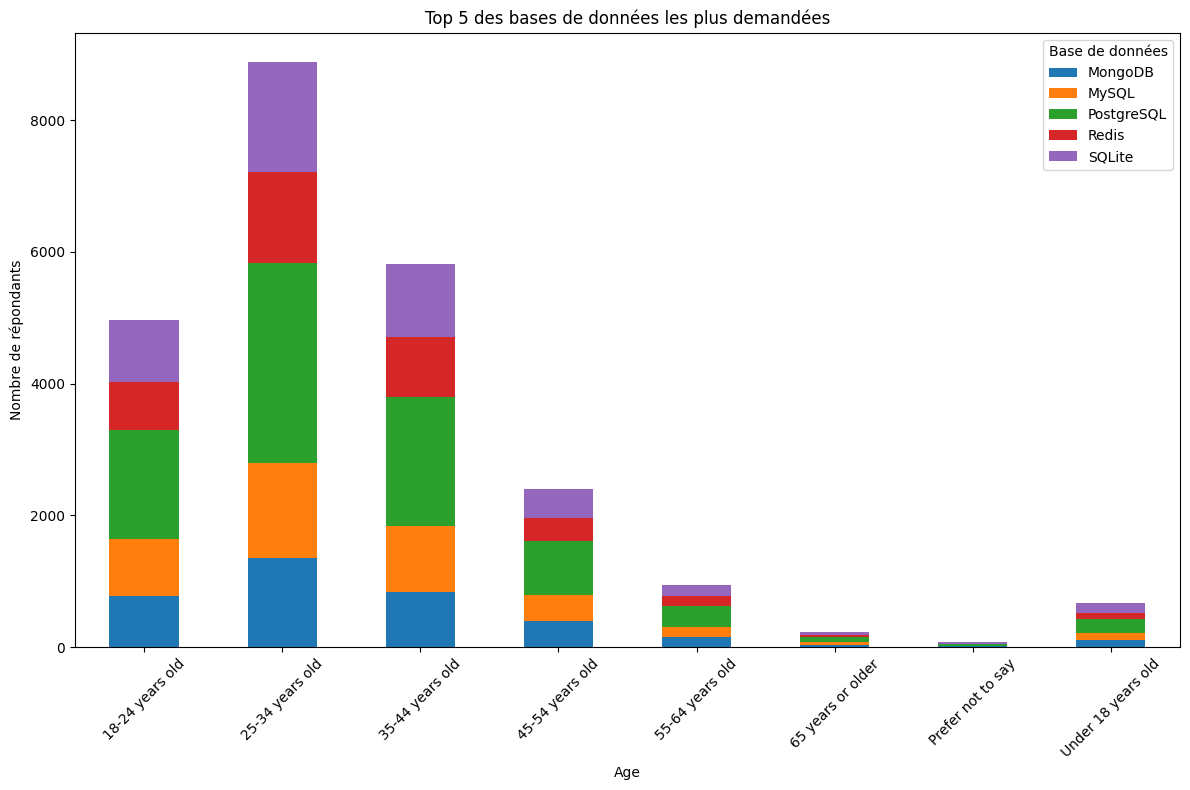

In [13]:
##Write your code here
df_database = df[['Age', 'DatabaseWantToWorkWith']].dropna()
df_exploded = df_database.assign(Database = df_database['DatabaseWantToWorkWith'].str.split(';').explode('Database')) 

top5_database = df_exploded['Database'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['Database'].isin(top5_database)]

cross_tab = pd.crosstab(df_filtered['Age'], df_filtered['Database'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 des bases de données les plus demandées')
plt.xlabel('Age')
plt.ylabel('Nombre de répondants')
plt.xticks(rotation=45)
plt.legend(title='Base de données')

plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_4497/4269142193.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


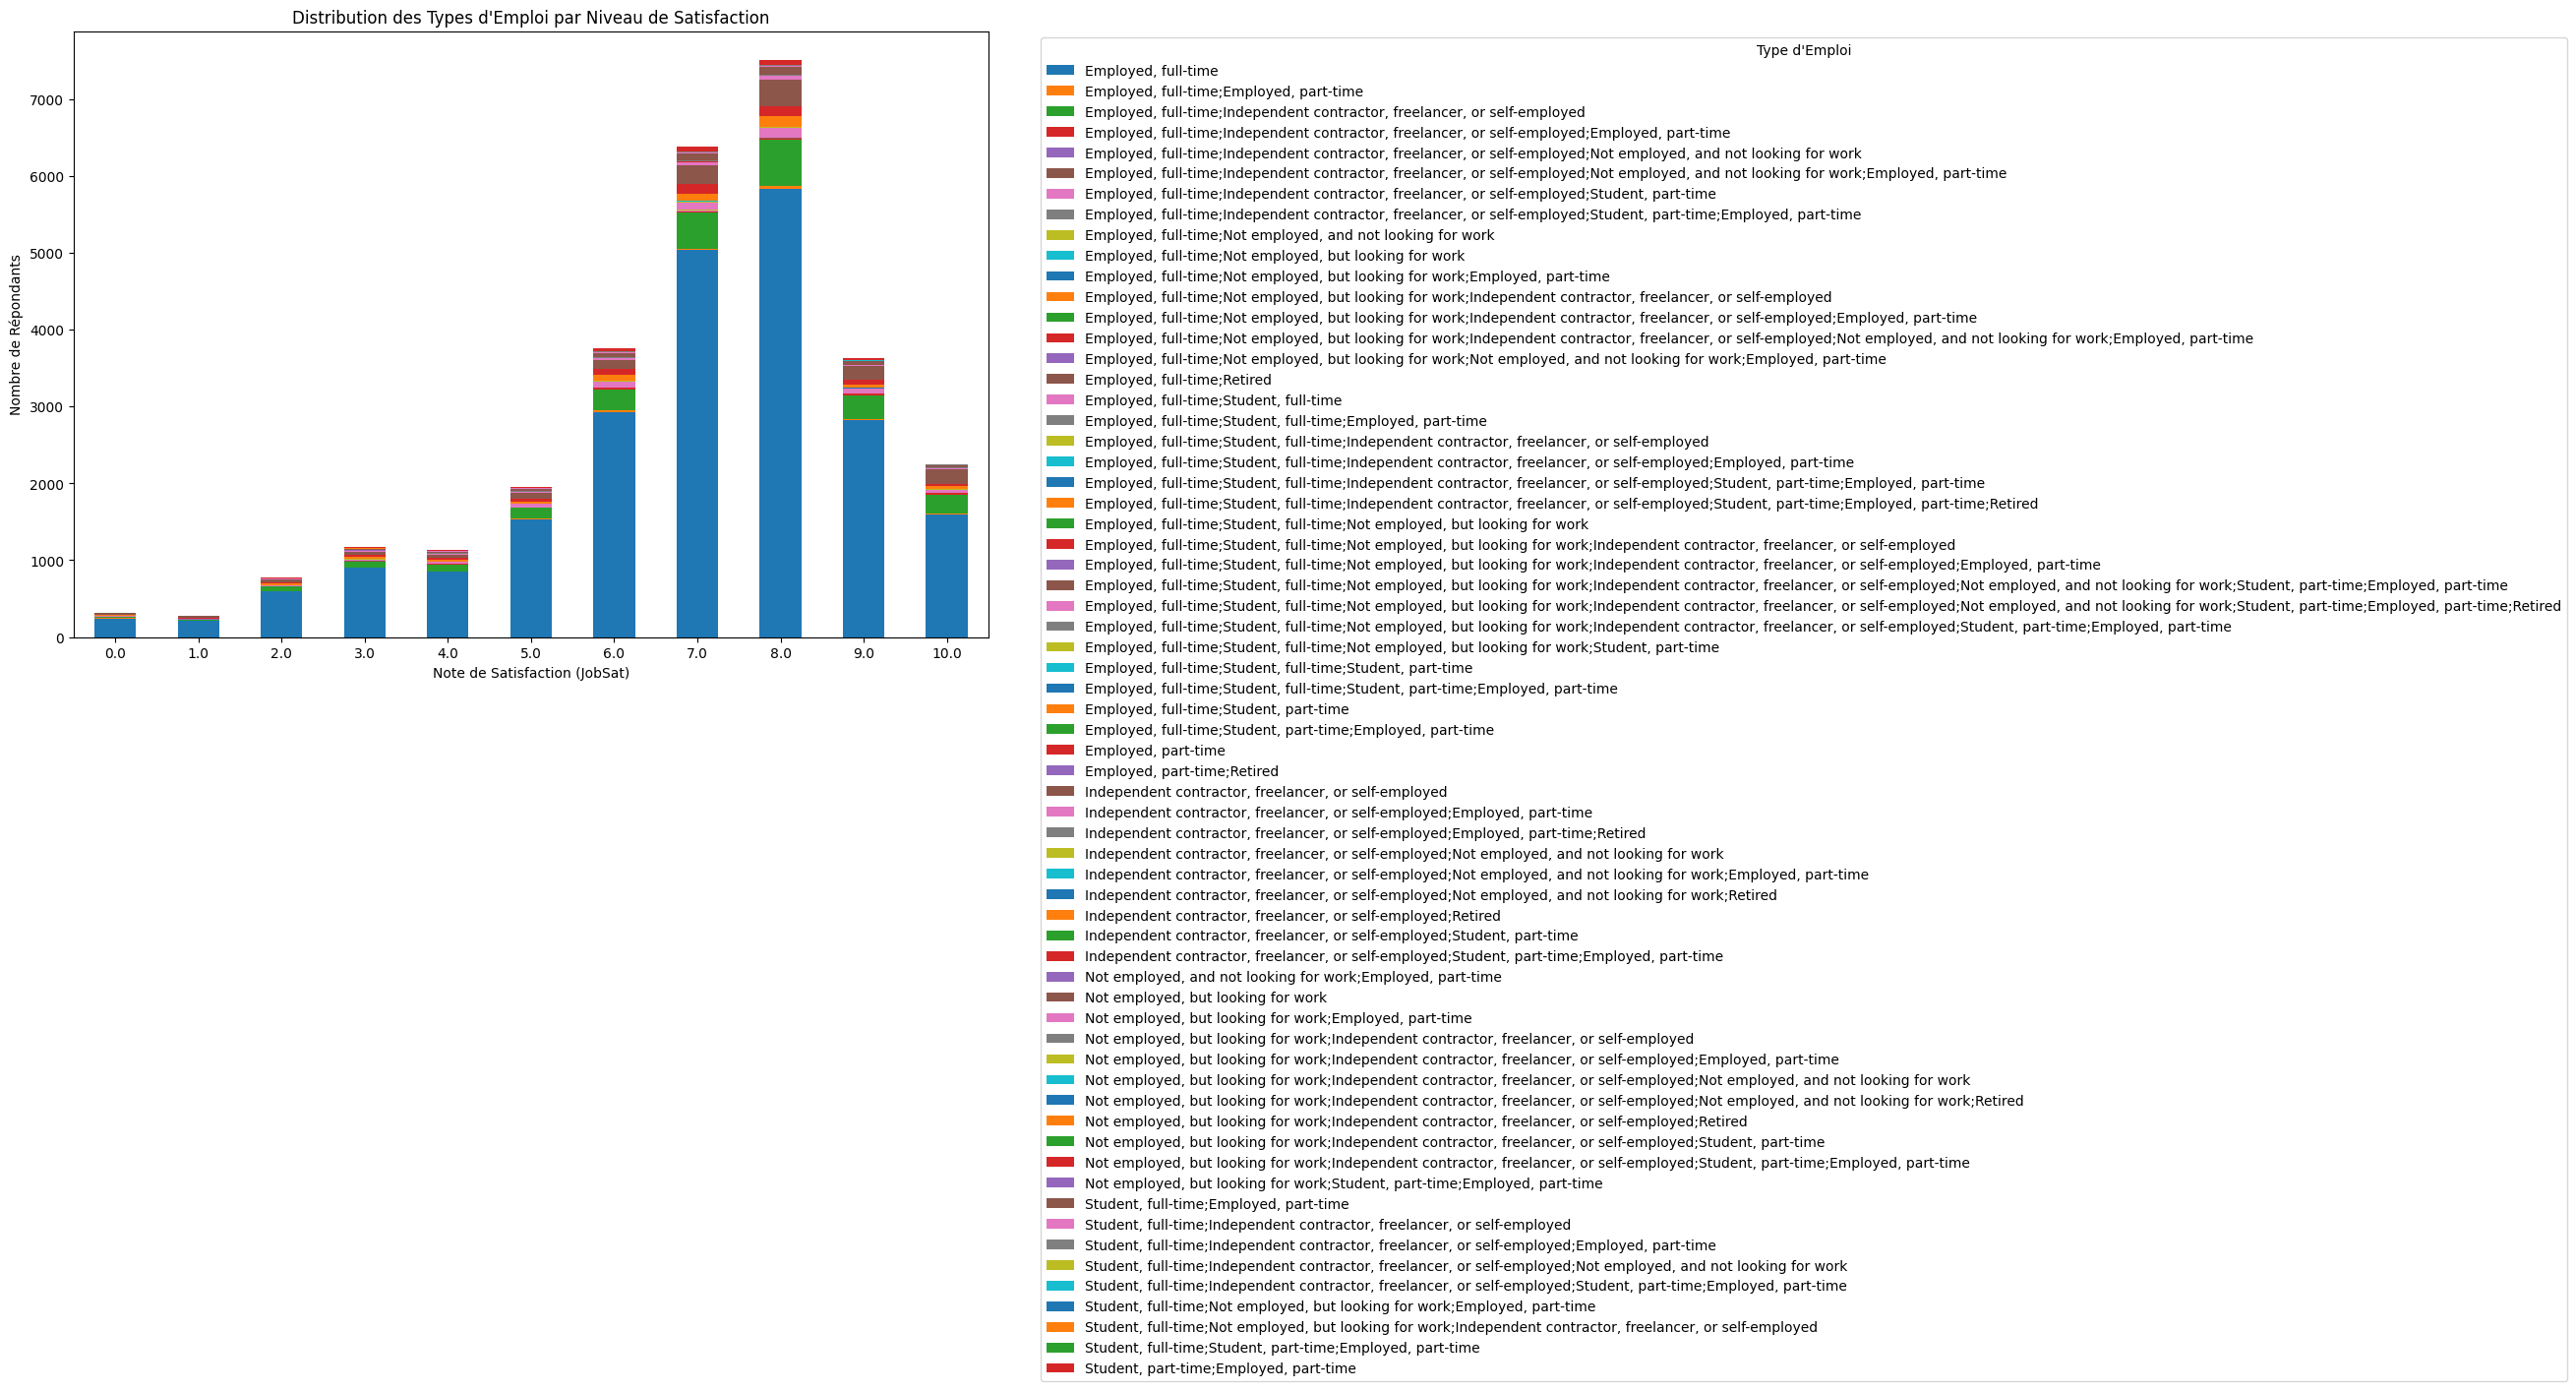

In [19]:
##Write your code here
df_clean = df[['JobSat', 'Employment']].dropna()
cross_tab = pd.crosstab(df_clean['JobSat'], df_clean['Employment'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution des Types d\'Emploi par Niveau de Satisfaction')
plt.xlabel('Note de Satisfaction (JobSat)')
plt.ylabel('Nombre de Répondants')
plt.xticks(rotation=0)
plt.legend(title='Type d\'Emploi', bbox_to_anchor=(1.05, 1), loc='upper left') # Légende sur le côté

plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


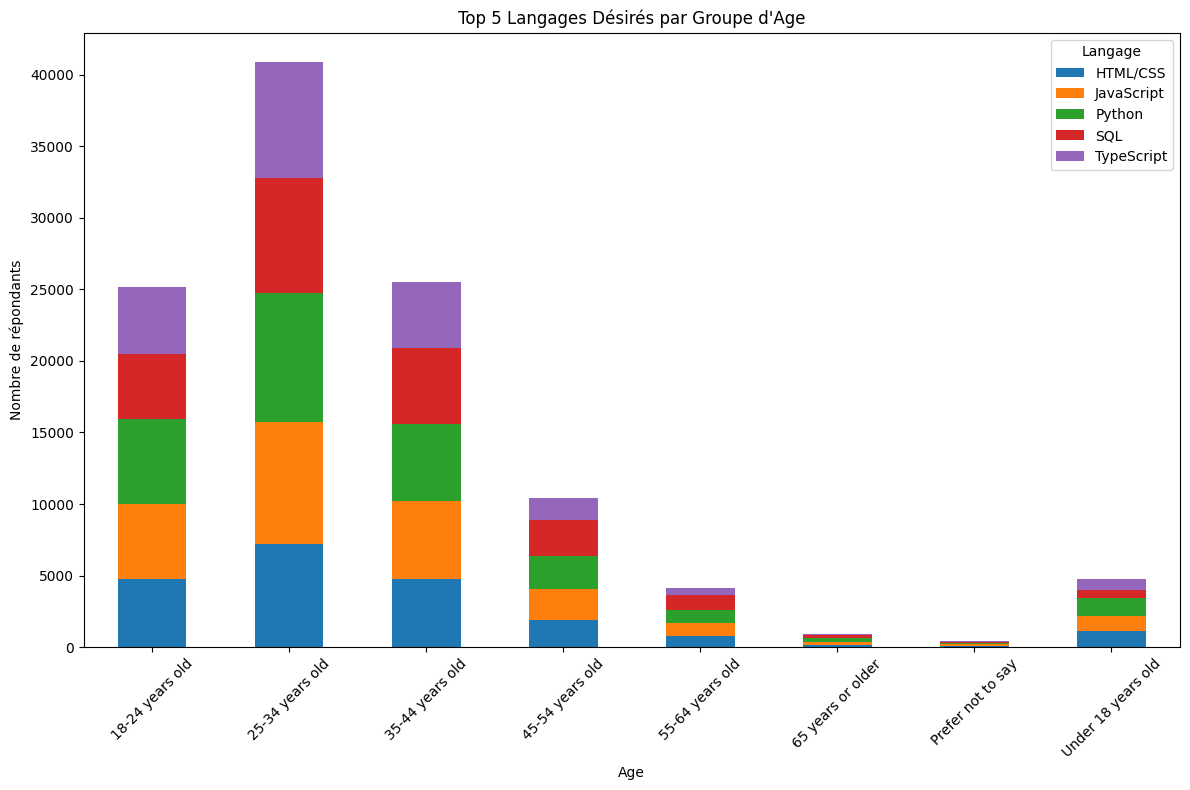

In [21]:
##Write your code here
df_clean = df[['Age', 'LanguageWantToWorkWith']].dropna()
df_exploded = df_clean.assign(Languages = df_clean['LanguageWantToWorkWith'].str.split(';')).explode('Languages')
top5_languages = df_exploded['Languages'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['Languages'].isin(top5_languages)]
cross_tab = pd.crosstab(df_filtered['Age'], df_filtered['Languages'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Langages Désirés par Groupe d\'Age')
plt.xlabel('Age')
plt.ylabel('Nombre de répondants')
plt.xticks(rotation=45)
plt.legend(title='Langage')

plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


Colonnes trouvées : ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired']


/tmp/ipykernel_4497/2819473857.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


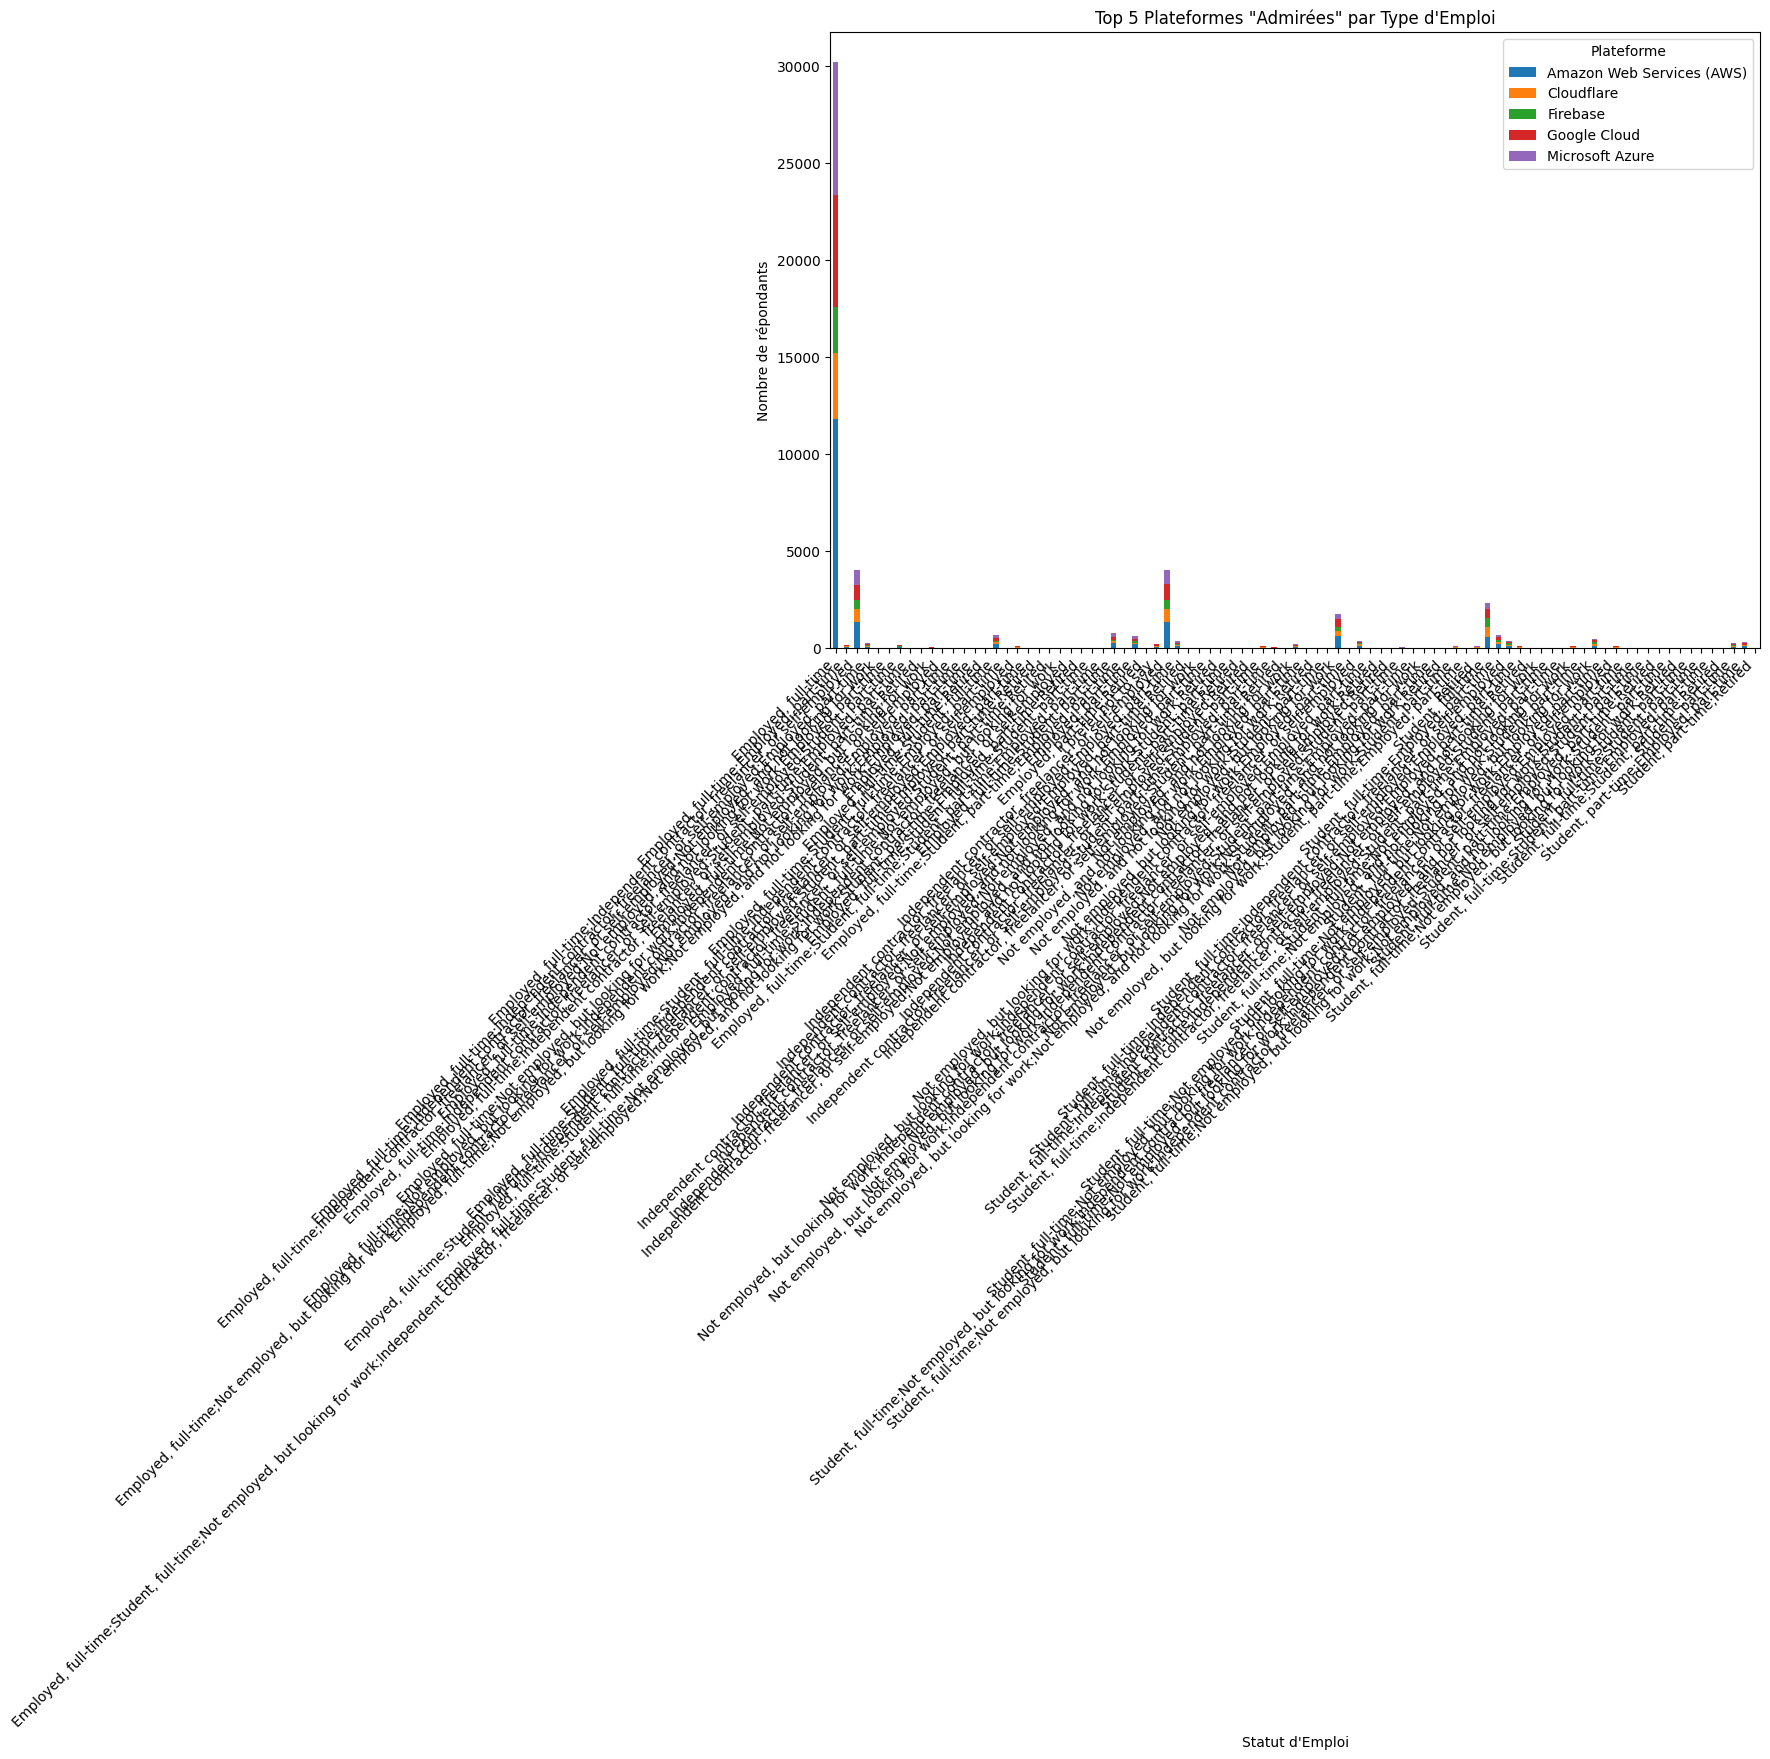

In [24]:
##Write your code here
# Ce code cherche toutes les colonnes qui contiennent le mot "Platform"
cols = [col for col in df.columns if 'Platform' in col]
print("Colonnes trouvées :", cols) 
df_emp = df[['Employment', 'PlatformAdmired']].dropna()

df_exploded = df_emp.assign(Platform = df_emp['PlatformAdmired'].str.split(';')).explode('Platform')
top5_platform = df_exploded['Platform'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['Platform'].isin(top5_platform)]

cross_tab = pd.crosstab(df_filtered['Employment'], df_filtered['Platform'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Plateformes "Admirées" par Type d\'Emploi')
plt.xlabel('Statut d\'Emploi')
plt.ylabel('Nombre de répondants')
plt.xticks(rotation=45, ha='right') # Rotation et alignement pour la lisibilité
plt.legend(title='Plateforme')

plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
